In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Hauses_pl.csv',encoding='latin-1')
data

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
23759,23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,W³ochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


In [3]:
data["city"].unique()

array(['Kraków', 'Warszawa', 'Poznañ'], dtype=object)

In [4]:
DF_WAW = data[data["city"] == "Warszawa"]
#Districts cleanings
dzielnice_warszawy = ["Mokotów","Śródmieście","Centrum","\x8cródmie\x9ccie","Żoliborz","¯oliborz","Wola","Ochota","Praga-Południe","Praga-Po³udnie","Ursus","Białołęka","Bia³o³êka","Targówek","Bemowo","Praga-Północ","Praga-Pó³noc","Wawer","Wilanów","Ursynów","Włochy","W³ochy","Bielany","Rembertów",
    "Wesoła",
    "Weso³a"
]

df_2 = DF_WAW[~DF_WAW['address'].str.contains('|'.join(dzielnice_warszawy))]
np.set_printoptions(threshold = np.inf)
df_2['address'].unique()

DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(['\x8cródmie\x9ccie', 'Śródmieście', 'Centrum'])), 'address'] = 'SRDM'
DF_WAW.loc[DF_WAW['address'].str.contains("Bemowo"), 'address'] = 'Bemowo'
DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(['Praga-Po³udnie','Praga-Południe'])), 'address'] = 'Praga_poludnie'
DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(['Mokotów',"Wilanowska"])), 'address'] = 'Mokotow'
DF_WAW.loc[DF_WAW['address'].str.contains("Ursynów"), 'address'] = 'Ursynow'
DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(["Żoliborz","¯oliborz"])), 'address'] = 'Zoliborz'
DF_WAW.loc[DF_WAW['address'].str.contains("Wola"), 'address'] = 'Wola'
DF_WAW.loc[DF_WAW['address'].str.contains("Ochota"), 'address'] = 'Ochota'
DF_WAW.loc[DF_WAW['address'].str.contains("Ursus"), 'address'] = 'Ursus'
DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(["Białołęka","Bia³o³êka"])), 'address'] = 'Bialoleka'
DF_WAW.loc[DF_WAW['address'].str.contains("Targówek"), 'address'] = 'Targowek'
DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(["Praga-Północ","Praga-Pó³noc"])), 'address'] = 'Praga_polnoc'
DF_WAW.loc[DF_WAW['address'].str.contains("Wawer"), 'address'] = 'Wawer'
DF_WAW.loc[DF_WAW['address'].str.contains("Wilanów"), 'address'] = 'Wilanow'
DF_WAW.loc[DF_WAW['address'].str.contains("Bielany"), 'address'] = 'Bielany'
DF_WAW.loc[DF_WAW['address'].str.contains("Rembertów"), 'address'] = 'Rembertow'
DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(["Włochy","W³ochy"])), 'address'] = 'Wlochy'
DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(["Wesoła","Weso³a"])), 'address'] = 'Wesola'
DF_WAW.loc[DF_WAW['address'].str.contains('|'.join(['Warszawa mazowieckie', 'mazowieckie'])), 'address'] = 'Mazowieckie'

DF_WAW = DF_WAW.reset_index(drop = True)
DF_WAW = DF_WAW.drop(['Unnamed: 0',"id","latitude","longitude","city"], axis = 1)
DF_WAW["year"] = DF_WAW["year"].astype(int)
DF_WAW["floor"] = DF_WAW["floor"].astype(int)
DF_WAW["rooms"] = DF_WAW["rooms"].astype(int)
DF_WAW["price"] = DF_WAW["price"].astype(int)
#One_hot_enc
cat = ['Praga_poludnie', 'Ochota', 'Mokotow', 'Ursynow', 'Bemowo', 'SRDM',
       'Bialoleka', 'Wola', 'Praga_polnoc', 'Wilanow', 'Wlochy',
       'Zoliborz', 'Ursus', 'Bielany', 'Targowek', 'Wawer', 'Wesola',
       'Rembertow', 'Mazowieckie']
one_hot = pd.get_dummies(DF_WAW["address"])
one_hot = one_hot.astype(int)
DF_0 = pd.concat([DF_WAW,one_hot], axis = 1)
DF_0 = DF_0.drop("address", axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

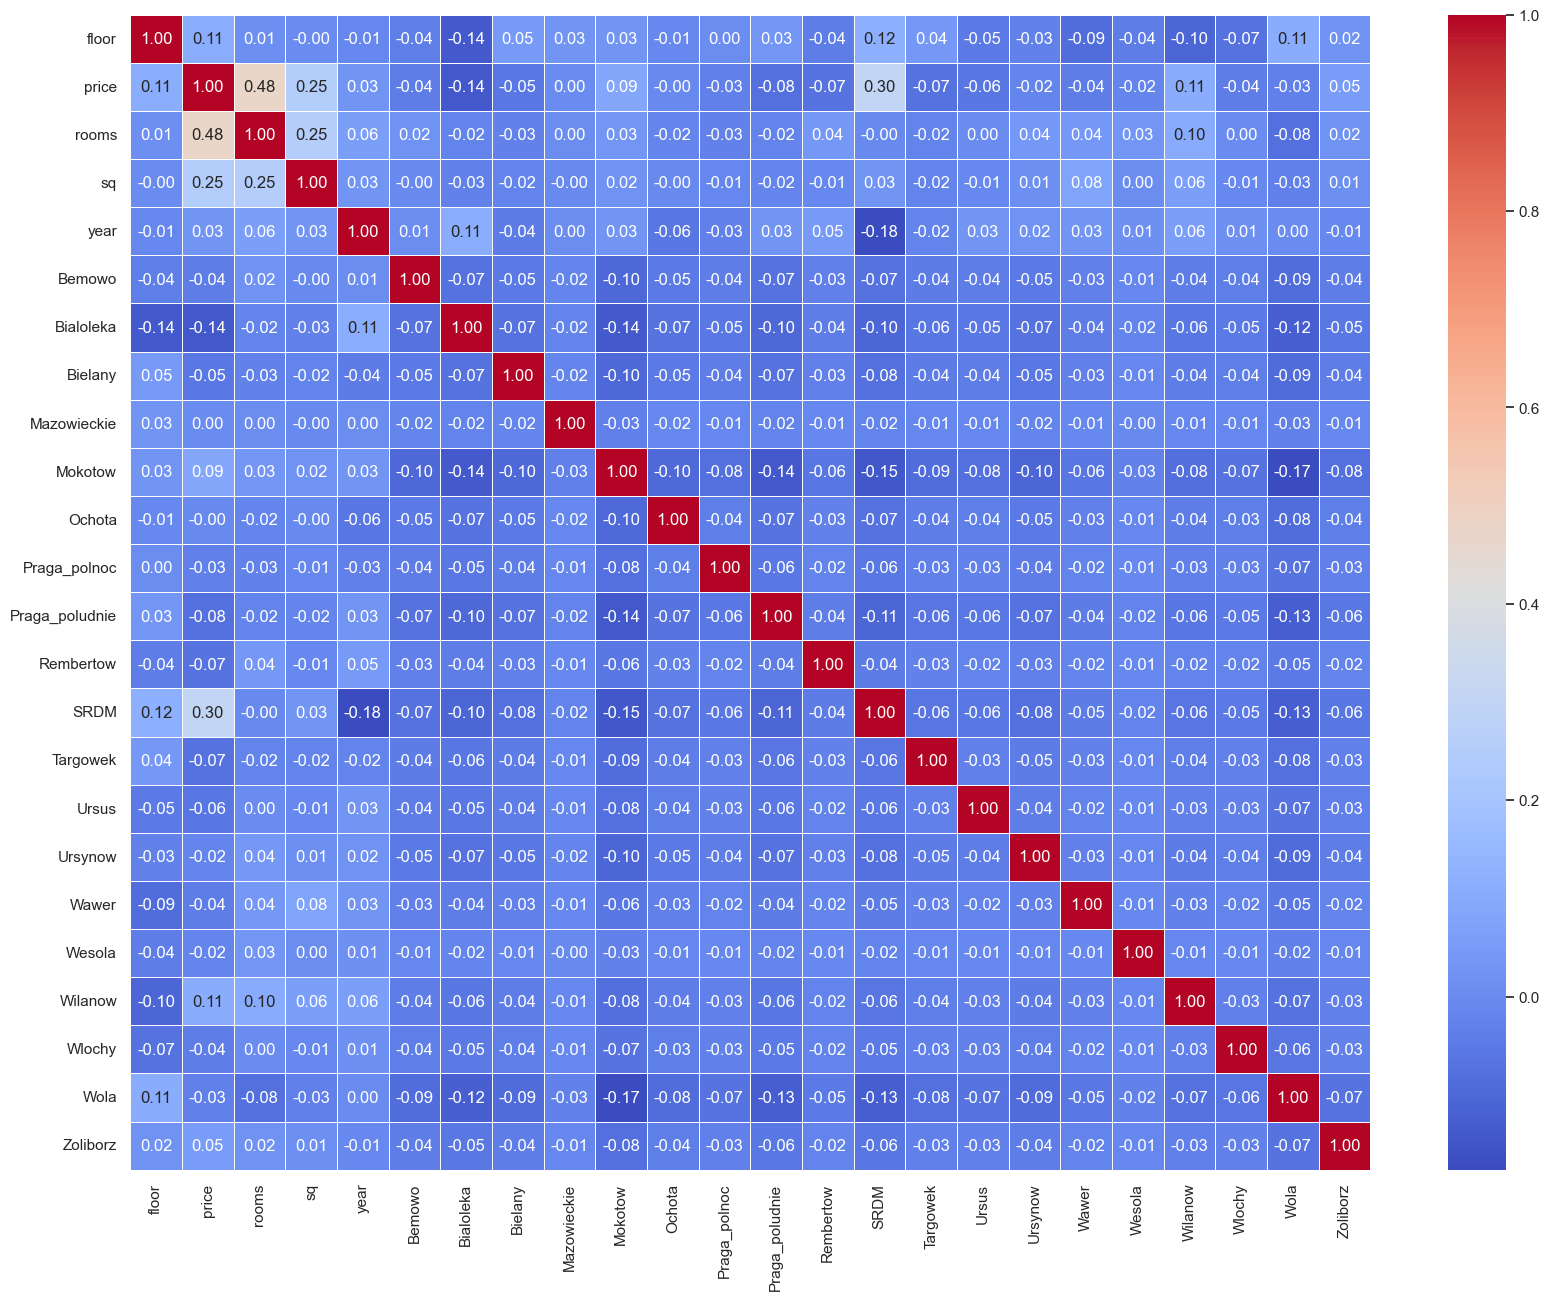

In [5]:
corr_matrix = DF_0.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = .5)
plt.show

In [6]:
np.set_printoptions(threshold = np.inf)
DF_0["year"].unique()

array([2021, 2020, 2003, 1982, 1999, 1968, 1989, 2005, 2008, 1960, 2013,
       1890, 1972, 2019, 2009, 2018, 1974, 2017, 2022, 1938, 1963, 1970,
       2015, 2012, 1980, 1971, 2007, 2001, 1973, 2006, 1975, 2000, 1978,
       1987, 2004, 2016, 1936, 1990, 1966, 1931, 1912, 1951, 2010, 1955,
       1956, 1983, 2011, 2014, 1965, 1967, 2002, 1952, 1964, 1977, 1927,
       1950, 1985, 1930, 1976, 1953, 1969, 1979, 1988, 1954, 1939, 1998,
       1911, 1997, 1962, 1959, 1981, 2023, 1900, 1879, 1946, 1995, 1908,
       1937,   75, 1994, 1923, 1935, 1880, 1949, 1992, 1920, 1958, 1993,
       1948, 1910, 1996, 1991, 1924, 1957, 1984, 1986, 1925, 1913, 1926,
       1922, 1961, 1895, 1932, 1854, 1886, 1901, 1929, 1916, 1830, 1934,
       2980,   80, 1947, 1914, 1898, 1902, 1928, 1918, 1940, 1904, 1784,
       1876, 1915, 1906, 1921,   81, 1905, 1760, 1070, 2024, 1945, 1933,
       1870, 1909, 1919, 1860,  214])

In [7]:
Q1 = DF_0['year'].quantile(0.25)
Q3 = DF_0['year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = DF_0['year'].median()
DF_0.loc[(DF_0['year'] < lower_bound) | (DF_0['year'] > upper_bound), 'year'] = median_value

Q1 = DF_0['sq'].quantile(0.25)
Q3 = DF_0['sq'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = DF_0['sq'].median()
DF_0.loc[(DF_0['sq'] < lower_bound) | (DF_0['sq'] > upper_bound), 'sq'] = median_value

Q1 = DF_0['price'].quantile(0.25)
Q3 = DF_0['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = DF_0['sq'].median()
DF_0.loc[(DF_0['price'] < lower_bound) | (DF_0['price'] > upper_bound), 'price'] = median_value

C:\Users\vital\AppData\Local\Temp\ipykernel_26540\1506339292.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '54.3' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  DF_0.loc[(DF_0['price'] < lower_bound) | (DF_0['price'] > upper_bound), 'price'] = median_value


In [8]:
from datetime import datetime
current_year = datetime.now().year
DF_0["AGE"] = current_year - DF_0['year']
DF_0 = DF_0.drop("year", axis = 1)
Y = DF_0['price']
X = DF_0.drop('price', axis = 1)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler_W = StandardScaler()
# scaler_y = StandardScaler()
# Y = scaler_y.fit_transform(np.array(Y).reshape(-1, 1))
X = scaler_W.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,Y,shuffle=True,test_size = 0.25, random_state = 42)

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import ElasticNet,Ridge,Lasso,SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
model = ExtraTreesRegressor(random_state=42)
model.fit(X_train,y_train.ravel())
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_pred,y_test)
mae

75105.64101207431

In [12]:
r2_score(y_test,y_pred)

0.570102782340914

In [13]:
# y_pred_unscaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
# y_test_unscaled = scaler_y.inverse_transform(y_test)

In [14]:
# a = pd.Series(y_pred_unscaled.reshape(-1))
# b = pd.Series(y_test_unscaled.reshape(-1,))
df = pd.DataFrame()
df['Pred'] = y_pred 
df['True'] = np.array(y_test)
df['Pred'] = df['Pred'].apply(lambda x: "{:.0f}".format(x)).astype(float)
df["Differance"] = abs(df['Pred'] - df['True'])
df["Differance"]

0            0.0
1            0.0
2         3144.0
3       236629.0
4         2923.0
          ...   
2458       689.0
2459     89000.0
2460     13000.0
2461     19380.0
2462     35625.0
Name: Differance, Length: 2463, dtype: float64

<Figure size 2000x1000 with 0 Axes>

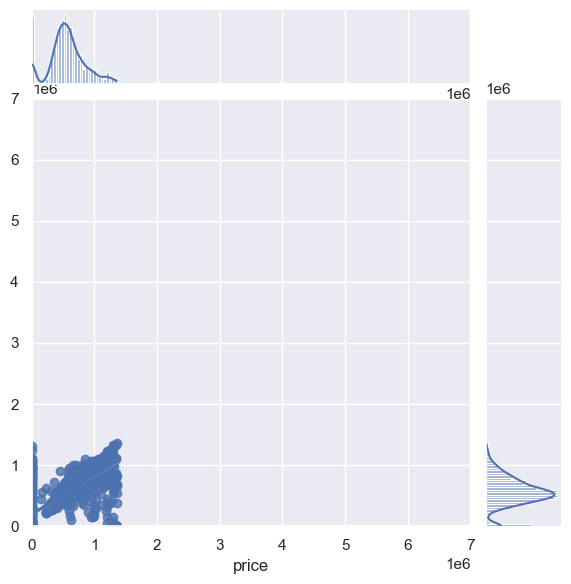

In [15]:
plt.figure(figsize=(20,10))
sns.jointplot(x=y_test, y=y_pred, kind="reg")
plt.xlim(0, 7000000)
plt.ylim(0, 7000000)
plt.show()

In [17]:
DF_WAW["AGE"] = current_year - DF_WAW['year']

In [18]:
df.to_excel('output.xlsx', index=False)

In [19]:
DF_KRAKOW = data[data["city"] == "Kraków"]
DF_KRAKOW = DF_KRAKOW.reset_index(drop = True)

In [20]:
dzielnice_krakowa = ["Stare Miasto", 
                     "Kazimierz", 
                     "Nowa Huta", 
                     "Podgórze", 
                     "Krowodrza", 
                     "Łagiewniki-Borek Fałęcki","£agiewniki-Borek Fa³êcki",
                     "Prądnik Czerwony","Pr¹dnik Czerwony", 
                     "Prądnik Biały","Pr¹dnik Bia³y", 
                     "Czyżyny", 
                     "Podgórze Duchackie", 
                     "Bieżanów-Prokocim","Bie¿anów-Prokocim", 
                     "Swoszowice", 
                     "Wzgórza Krzesławickie","Wzgórza Krzes³awickie", 
                     "Dębniki","Dêbniki",
                     "Zwierzyniec", 
                     "Bronowice", 
                     "Wola Justowska", 
                     "Śródmieście","\x8cródmie\x9ccie", 
                     "Bieńczyce","Bieñczyce", 
                     "Wesoła", 
                     "Zabłocie", 
                     "Bronowice Małe", 
                     "Lipnica Murowana", 
                     "Biały Kościół", 
                     "Salwator", 
                     "Stare Podgórze", 
                     "Sławojów", 
                     "Zarzecze",
                     "Osiedle VIII", 
                     "Nawojowa Góra",
                    "Grzegórzki",
                    "Mistrzejowice"]
df_2 = DF_KRAKOW[~DF_KRAKOW['address'].str.contains('|'.join(dzielnice_krakowa))]
np.set_printoptions(threshold = np.inf)
df_2['address'].unique()

array(['ma³opolskie', 'Kraków ma³opolskie', 'Czy¿yny £êg So³tysowska'],
      dtype=object)

In [21]:
mapping = {
    "Stare Miasto": "Stare_Miasto",
    "Kazimierz": "Kazimierz",
    "Nowa Huta": "Nowa_Huta",
    "Podgórze": "Podgorze",
    "Krowodrza": "Krowodrza",
    "Łagiewniki-Borek Fałęcki": "Lagiewniki_Borek_Falecki",
    "£agiewniki-Borek Fa³êcki": "Lagiewniki_Borek_Falecki",
    "Prądnik Czerwony": "Pradnik_Czerwony",
    "Pr¹dnik Czerwony": "Pradnik_Czerwony",
    "Prądnik Biały": "Pradnik_Bialy",
    "Pr¹dnik Biały": "Pradnik_Bialy",
    "Pr¹dnik Bia³y": "Pradnik_Bialy",
    "Czyżyny": "Czyzyny",
    "Czy¿yny": "Czyzyny",
    "Podgórze Duchackie": "Podgorze_Duchackie",
    "Bieżanów-Prokocim": "Biezanow_Prokocim",
    "Bie¿anów-Prokocim": "Biezanow_Prokocim",
    "Swoszowice": "Swoszowice",
    "Wzgórza Krzesławickie": "Wzgorza_Krzeslawickie",
    "Wzgórza Krzes³awickie": "Wzgorza_Krzeslawickie",
    "Dębniki": "Debniki",
    "Dêbniki": "Debniki",
    "Zwierzyniec": "Zwierzyniec",
    "Bronowice": "Bronowice",
    "Wola Justowska": "Wola_Justowska",
    "Śródmieście": "Srodmiescie",
    "\x8cródmie\x9ccie": "Srodmiescie",
    "Bieńczyce": "Bienczyce",
    "Bieñczyce": "Bienczyce",
    "Wesoła": "Wesola",
    "Zabłocie": "Zablocie",
    "Bronowice Małe": "Bronowice_Male",
    "Lipnica Murowana": "Lipnica_Murowana",
    "Biały Kościół": "Bialy_Kosciol",
    "Salwator": "Salwator",
    "Stare Podgórze": "Stare_Podgorze",
    "Sławojów": "Slawojow",
    "Zarzecze": "Zarzecze",
    "Osiedle VIII": "Osiedle_VIII",
    "Nawojowa Góra": "Nawojowa_Gora",
    "Grzegórzki": "Grzegorzki",
    "Mistrzejowice": "Mistrzejowice"
}
for old_name, new_name in mapping.items():
    DF_KRAKOW.loc[DF_KRAKOW['address'].str.contains(old_name), 'address'] = new_name
    
DF_KRAKOW = DF_KRAKOW[DF_KRAKOW['address'].isin(mapping.values())]

In [22]:
DF_KRAKOW['address'].unique()

array(['Podgorze', 'Krowodrza', 'Nowa_Huta', 'Pradnik_Czerwony',
       'Stare_Miasto', 'Pradnik_Bialy', 'Debniki', 'Zwierzyniec',
       'Grzegorzki', 'Wzgorza_Krzeslawickie', 'Bronowice',
       'Biezanow_Prokocim', 'Mistrzejowice', 'Lagiewniki_Borek_Falecki',
       'Kazimierz', 'Bienczyce', 'Srodmiescie', 'Swoszowice', 'Czyzyny'],
      dtype=object)

In [23]:
DF_KRAKOW = DF_KRAKOW.reset_index(drop = True)
DF_KRAKOW = DF_KRAKOW.drop(['Unnamed: 0',"id","city","longitude","latitude"], axis = 1)
DF_KRAKOW["year"] = DF_KRAKOW["year"].astype(int)
DF_KRAKOW["floor"] = DF_KRAKOW["floor"].astype(int)
DF_KRAKOW["rooms"] = DF_KRAKOW["rooms"].astype(int)
DF_KRAKOW["price"] = DF_KRAKOW["price"].astype(int)

In [24]:
DF_KRAKOW.columns

Index(['address', 'floor', 'price', 'rooms', 'sq', 'year'], dtype='object')

In [25]:
one_hot_kr = pd.get_dummies(DF_KRAKOW["address"])
one_hot_kr = one_hot_kr.astype(int)
DF_KRAKOW_0 = pd.concat([DF_KRAKOW,one_hot_kr], axis = 1)
DF_KRAKOW_0 = DF_KRAKOW_0.drop("address", axis = 1)

In [26]:
DF_KRAKOW_0

,floor,price,rooms,sq,year,Bienczyce,Biezanow_Prokocim,Bronowice,Czyzyny,Debniki,...,Mistrzejowice,Nowa_Huta,Podgorze,Pradnik_Bialy,Pradnik_Czerwony,Srodmiescie,Stare_Miasto,Swoszowice,Wzgorza_Krzeslawickie,Zwierzyniec
0,2,749000,3,74.05,2021,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,427000,2,37.00,1970,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,414600,1,34.55,2022,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,750000,4,81.40,2021,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,280000,1,16.20,1930,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,0,629900,3,53.34,2020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9678,4,749000,3,75.86,2021,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9679,3,479000,3,55.20,2021,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9680,4,570000,2,46.29,2016,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

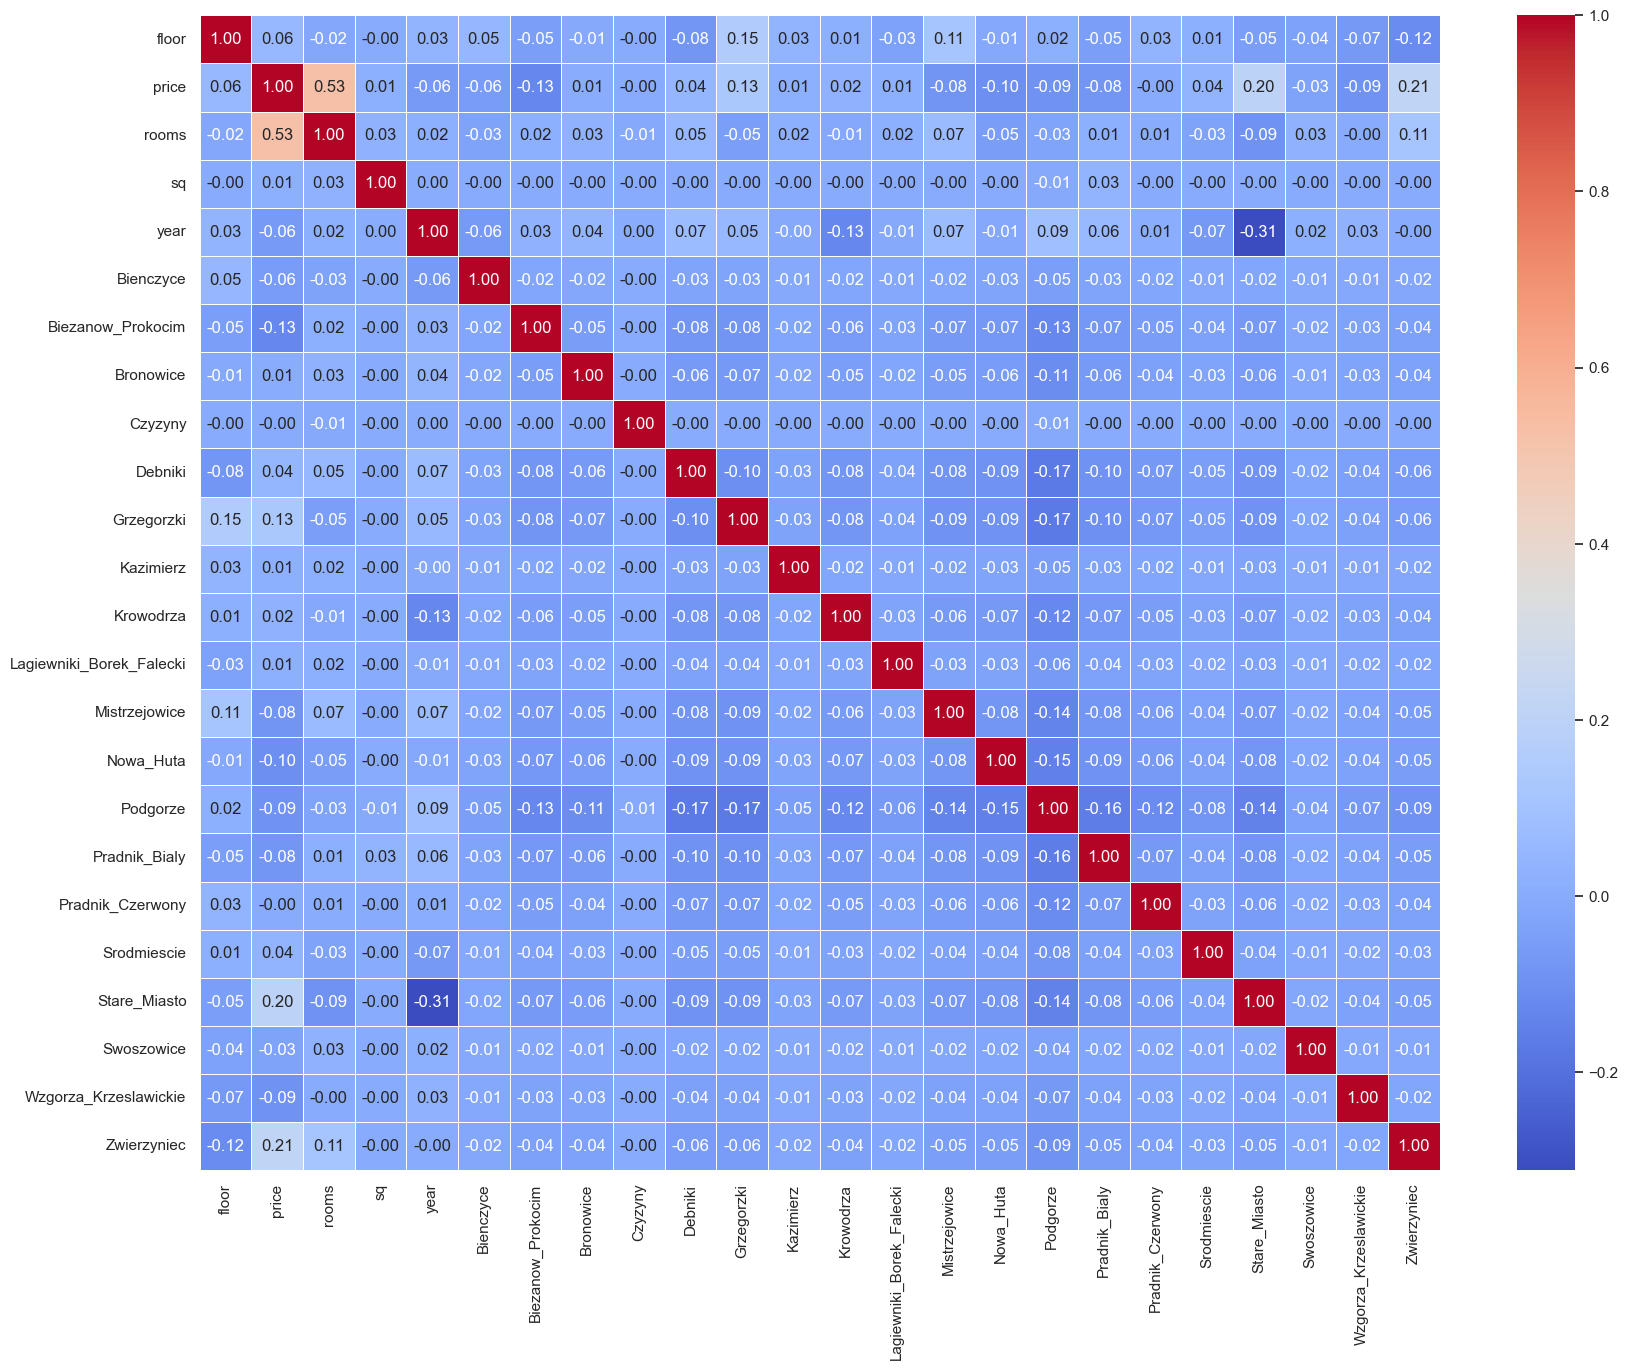

In [27]:
corr_matrix_kr = DF_KRAKOW_0.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr_matrix_kr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = .5)
plt.show

In [28]:
DF_KRAKOW_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   floor                     9682 non-null   int32  
 1   price                     9682 non-null   int32  
 2   rooms                     9682 non-null   int32  
 3   sq                        9682 non-null   float64
 4   year                      9682 non-null   int32  
 5   Bienczyce                 9682 non-null   int32  
 6   Biezanow_Prokocim         9682 non-null   int32  
 7   Bronowice                 9682 non-null   int32  
 8   Czyzyny                   9682 non-null   int32  
 9   Debniki                   9682 non-null   int32  
 10  Grzegorzki                9682 non-null   int32  
 11  Kazimierz                 9682 non-null   int32  
 12  Krowodrza                 9682 non-null   int32  
 13  Lagiewniki_Borek_Falecki  9682 non-null   int32  
 14  Mistrzej

In [29]:
Q1 = DF_KRAKOW_0['year'].quantile(0.25)
Q3 = DF_KRAKOW_0['year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = DF_KRAKOW_0['year'].median()
DF_KRAKOW_0.loc[(DF_KRAKOW_0['year'] < lower_bound) | (DF_KRAKOW_0['year'] > upper_bound), 'year'] = median_value

Q1 = DF_KRAKOW_0['sq'].quantile(0.25)
Q3 = DF_KRAKOW_0['sq'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = DF_0['sq'].median()
DF_KRAKOW_0.loc[(DF_KRAKOW_0['sq'] < lower_bound) | (DF_KRAKOW_0['sq'] > upper_bound), 'sq'] = median_value

Q1 = DF_KRAKOW_0['price'].quantile(0.25)
Q3 = DF_KRAKOW_0['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = DF_0['sq'].median()
DF_KRAKOW_0.loc[(DF_KRAKOW_0['price'] < lower_bound) | (DF_KRAKOW_0['price'] > upper_bound), 'price'] = median_value

C:\Users\vital\AppData\Local\Temp\ipykernel_26540\841597555.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '54.3' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  DF_KRAKOW_0.loc[(DF_KRAKOW_0['price'] < lower_bound) | (DF_KRAKOW_0['price'] > upper_bound), 'price'] = median_value


In [30]:
DF_KRAKOW_0["price"] = DF_KRAKOW["price"].astype(int)

In [31]:
current_year = datetime.now().year
DF_KRAKOW_0["AGE"] = current_year - DF_KRAKOW_0['year']
DF_KRAKOW_0 = DF_KRAKOW_0.drop("year", axis = 1)
Y_0 = DF_KRAKOW_0['price']
X_0 = DF_KRAKOW_0.drop('price', axis = 1)

In [32]:

scaler_K = StandardScaler()
X_0 = scaler_K.fit_transform(X_0)

In [33]:
X_train_k,X_test_k,y_train_k,y_test_k = train_test_split(X_0,Y_0,shuffle=True,test_size = 0.25, random_state = 42)

In [34]:
model_k = ExtraTreesRegressor(random_state=42)
model_k.fit(X_train_k,y_train_k)
y_pred_k = model_k.predict(X_test_k)
mae_k = mean_absolute_error(y_pred_k,y_test_k)
mae_k 

61849.1254068665

In [35]:
DF_KRAKOW["AGE"] = current_year - DF_KRAKOW['year']
DF_KRAKOW.to_csv("DF_KRAKOW.csv", index = False)

In [37]:
import skl2onnx
from skl2onnx import convert_sklearn

In [38]:
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

with open("extra_trees_regressor.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [39]:
initial_type = [('input', FloatTensorType([None, X_train_k.shape[1]]))]
onnx_model = convert_sklearn(model_k, initial_types=initial_type)

with open("extra_trees_regressor_krak.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [40]:
DF_KRAKOW_0.drop('price', axis = 1)

,floor,rooms,sq,Bienczyce,Biezanow_Prokocim,Bronowice,Czyzyny,Debniki,Grzegorzki,Kazimierz,...,Nowa_Huta,Podgorze,Pradnik_Bialy,Pradnik_Czerwony,Srodmiescie,Stare_Miasto,Swoszowice,Wzgorza_Krzeslawickie,Zwierzyniec,AGE
0,2,3,74.05,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
1,2,2,37.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2,1,34.55,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
3,0,4,81.40,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
4,2,1,16.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,0,3,53.34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
9678,4,3,75.86,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
9679,3,3,55.20,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
9680,4,2,46.29,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,8


In [43]:
means = scaler_W.mean_
stds = scaler_W.scale_
print("Среднее значение для каждого признака:", means)
print("Стандартное отклонение для каждого признака:", stds)

Среднее значение для каждого признака: [3.27956553e+00 2.62734748e+00 5.52943488e+01 4.85229926e-02
 8.93310324e-02 5.00456806e-02 5.07562684e-03 1.64957872e-01
 4.45640037e-02 2.83219978e-02 9.48127094e-02 1.68510811e-02
 9.81626231e-02 3.64430007e-02 2.86265354e-02 5.08577809e-02
 1.84752817e-02 3.95898894e-03 3.37021622e-02 2.43630088e-02
 1.33488986e-01 2.94386357e-02 2.63737692e+01]
Стандартное отклонение для каждого признака: [ 2.81515391  1.01280967 18.54096732  0.21486859  0.28522097  0.21803924
  0.0710624   0.37114252  0.2063445   0.16589112  0.29295607  0.12871333
  0.29753441  0.18738972  0.16675448  0.21970723  0.13466234  0.06279582
  0.18046143  0.15417345  0.34010245  0.16903255 25.94239377]


In [45]:
means_K = scaler_K.mean_
stds_K = scaler_K.scale_
print("Среднее значение для каждого признака:", means_K)
print("Стандартное отклонение для каждого признака:", stds_K)

Среднее значение для каждого признака: [2.54121049e+00 2.59812022e+00 5.37620048e+01 7.74633340e-03
 5.83557116e-02 3.94546581e-02 1.03284445e-04 9.26461475e-02
 9.64676720e-02 8.67589341e-03 5.35013427e-02 1.34269779e-02
 6.54823384e-02 7.64304896e-02 2.16277629e-01 8.26275563e-02
 4.60648626e-02 2.03470357e-02 6.96137162e-02 4.64780004e-03
 1.72485024e-02 3.08820492e-02 8.68425945e+00]
Стандартное отклонение для каждого признака: [2.17105846e+00 9.90936294e-01 1.71537945e+01 8.76717042e-02
 2.34414851e-01 1.94674056e-01 1.01623707e-02 2.89935922e-01
 2.95231537e-01 9.27395400e-02 2.25030996e-01 1.15094284e-01
 2.47375022e-01 2.65685660e-01 4.11705740e-01 2.75318440e-01
 2.09625597e-01 1.41184397e-01 2.54494885e-01 6.80161598e-02
 1.30195974e-01 1.72998116e-01 1.15424178e+01]


In [53]:
stds_K.shape

(23,)

In [68]:
new_input = [[2,3,74.05,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3]]

In [73]:
new_input = scaler_K.transform(new_input)
model_k.predict(new_input)

C:\Users\vital\anaconda3\envs\TF2.0\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([749000.])

In [74]:
new_input

array([[-0.24928416,  0.40555561,  1.18271181, -0.08835614, -0.24894204,
        -0.20267035, -0.01016342, -0.31954008, -0.3267526 , -0.09355118,
        -0.23775099, -0.11666068, -0.26470877, -0.28767262,  1.90359836,
        -0.30011632, -0.21974827, -0.14411675, -0.2735368 , -0.06833376,
        -0.13248107, -0.1785109 , -0.49246696]])